In [15]:
import warnings
import numpy as np
import pandas as pd
from scipy.stats import kstest


warnings.filterwarnings("ignore")

In [17]:
def generate_user_data(n_users=None, noise=None, noise_factor=None) -> pd.DataFrame:
    """Сгенерирует заданное количество пользователей и распределение метрики с заданной долей аномалий в данных
    
    :param n_users: кол-во пользователей 
    :param noise: доля пользователей у которых будут аномальные значения 
    :param noise_factor: размер аномалии 
    :return: pd.DataFrame
    """
    
    # Генерация нормального распределения для количества дней
    mean_days = 100  # среднее количество дней, проведенных в спортзале
    std_days = 20  # стандартное отклонение
    days = np.random.normal(loc=mean_days, scale=std_days, size=n_users)

    # Применение шума
    n_noisy_users = int(n_users * noise)
    noisy_indices = np.random.choice(n_users, n_noisy_users, replace=False)
    days[noisy_indices] *= noise_factor

    # Создание DataFrame
    user_ids = np.arange(1, n_users + 1)
    data = pd.DataFrame({
        'id': user_ids,
        'day': days
    })

    return data

In [18]:
def split_into_buckets(data:pd.DataFrame, n_buckets=100) -> pd.DataFrame:
    """Случайным образом распределит пользователей на заданное количество бакетов
    
    :param data: pd.DataFrame
    :param n_buckets: количество бакетов 
    :return: pd.DataFrame
    """
    
    # Перемешиваем DataFrame
    data = data.sample(frac=1).reset_index(drop=True)
    # Создаем столбец с номером бакета, используя pd.qcut
    data['bucket'] = pd.qcut(data.index, n_buckets, labels=False) + 1
    return data

In [19]:
def get_kstest_results(data):
    alpha = 0.05
    stat, p_value = kstest(data, 'norm')
    if p_value < alpha:
        print(f'statistics={stat:.3f}, p_value={p_value:.3f}. Распределение средних значений в бакетах нормальное (не отвергаем H0)')
    else:
        print(f'statistics={stat:.3f}, p_value={p_value:.3f}. Распределение не является нормальным (отвергаем H0)')

In [20]:
def create(n_users, noise_factor, n_buckets: int=None, noise: float=None) -> None:
    data = generate_user_data(n_users, noise, noise_factor)
    data = split_into_buckets(data)

    # Графики
    data['day'].plot(kind='hist', figsize=(15, 5), title='Распределение исходных данных')
    buckets_avg = data.groupby('bucket').agg({'day':'mean'})
    buckets_avg.plot(kind='hist', figsize=(15, 5), title='Распределение средних значений в бакетах')
    
    # Стат тест Колмогорова-Смирнова для проверки нормальности распределения
    get_kstest_results(buckets_avg['day'])

statistics=1.000, p_value=0.000. Распределение средних значений в бакетах нормальное (не отвергаем H0)


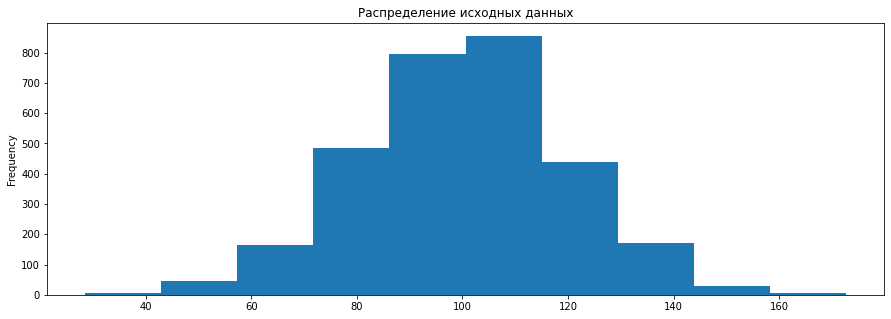

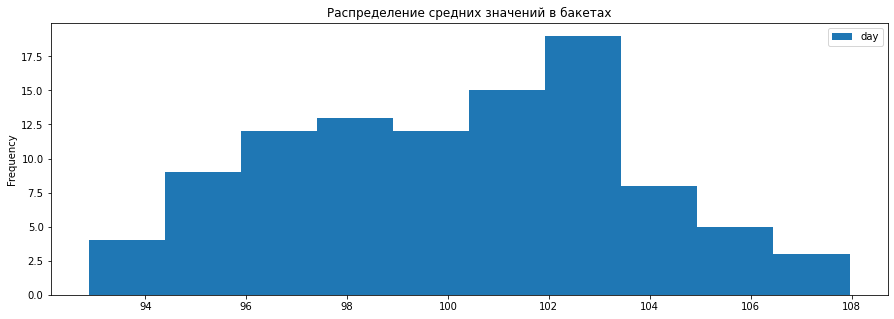

In [21]:
# Пример №1 – "Маленькая" выборка, аномалий нет
create(n_users=3000, noise=0.1, noise_factor=1, n_buckets=100)

statistics=1.000, p_value=0.000. Распределение средних значений в бакетах нормальное (не отвергаем H0)


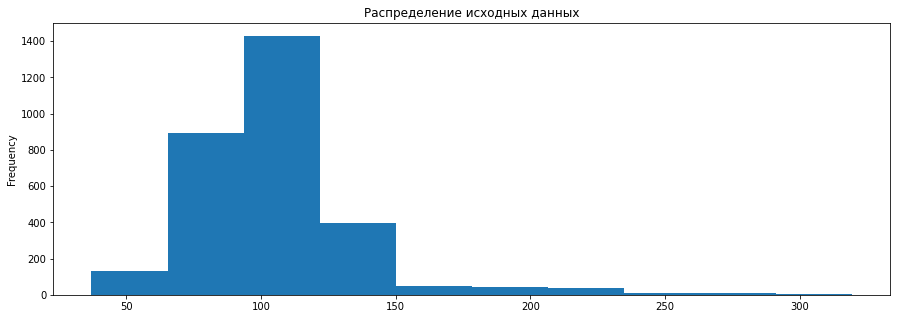

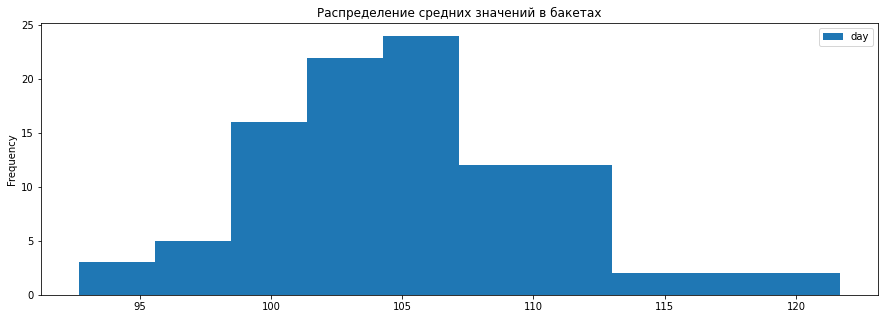

In [22]:
# Пример №2 – "Маленькая" выборка, аномалий мало и они слабые
create(n_users=3000, noise=0.05, noise_factor=2, n_buckets=100)

statistics=1.000, p_value=0.000. Распределение средних значений в бакетах нормальное (не отвергаем H0)


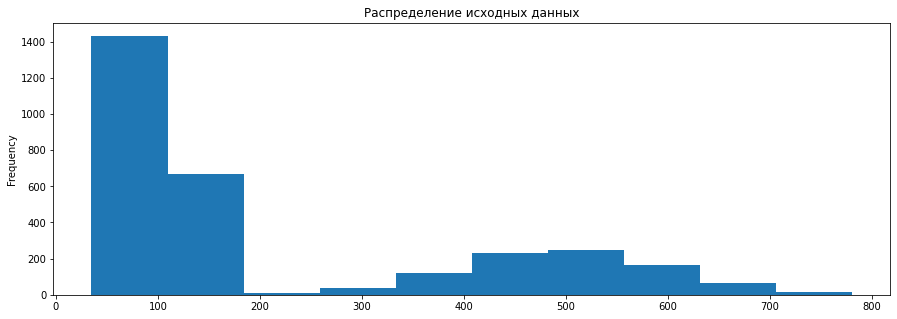

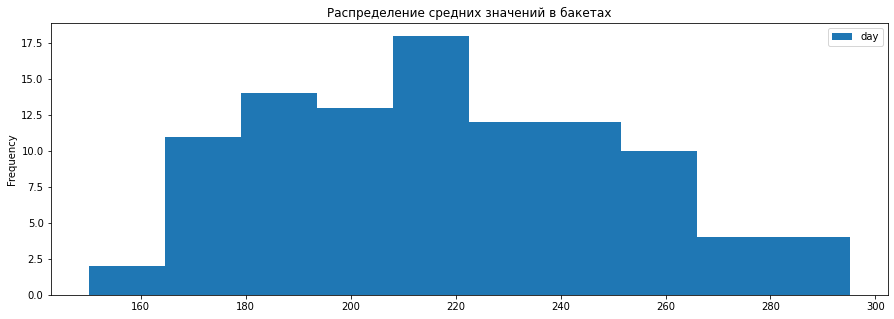

In [23]:
# Пример №3 – "Маленькая" выборка, аномалий много и они сильные
create(n_users=3000, noise=0.3, noise_factor=5, n_buckets=100)

statistics=1.000, p_value=0.000. Распределение средних значений в бакетах нормальное (не отвергаем H0)


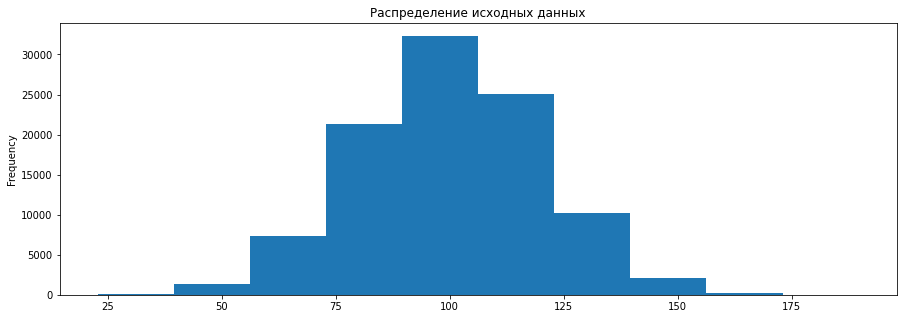

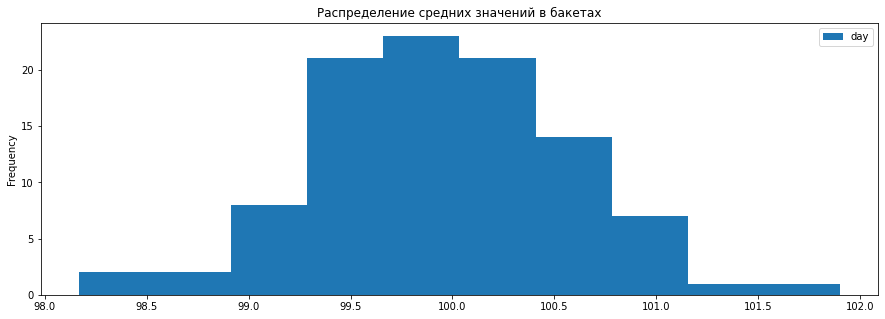

In [24]:
# Пример №4 – Большая выборка, аномалий мало и они слабые
create(n_users=100_000, noise=0.1, noise_factor=1, n_buckets=1000)

statistics=1.000, p_value=0.000. Распределение средних значений в бакетах нормальное (не отвергаем H0)


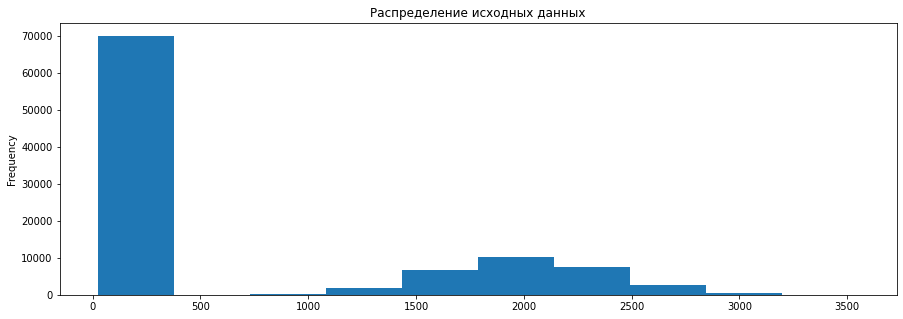

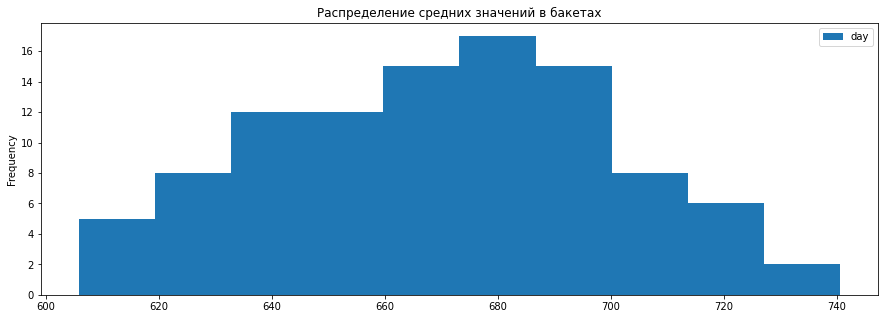

In [25]:
# Пример №5 – Большая выборка, аномалий много и они сильные 
create(n_users=100_000, noise=0.3, noise_factor=20, n_buckets=1000)